# IMPORT LIBRARY

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# keras imports
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# sklearn import
from sklearn.metrics import classification_report, confusion_matrix

# 1. LOAD DATASET AND PREPROCESSING

In [2]:
train_dir = "train"
validation_dir = "validation"


In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',  # binary ho to 'binary'
    color_mode='grayscale'

)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale'

)



Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# 2.EDA (Visualizeing Some Images)

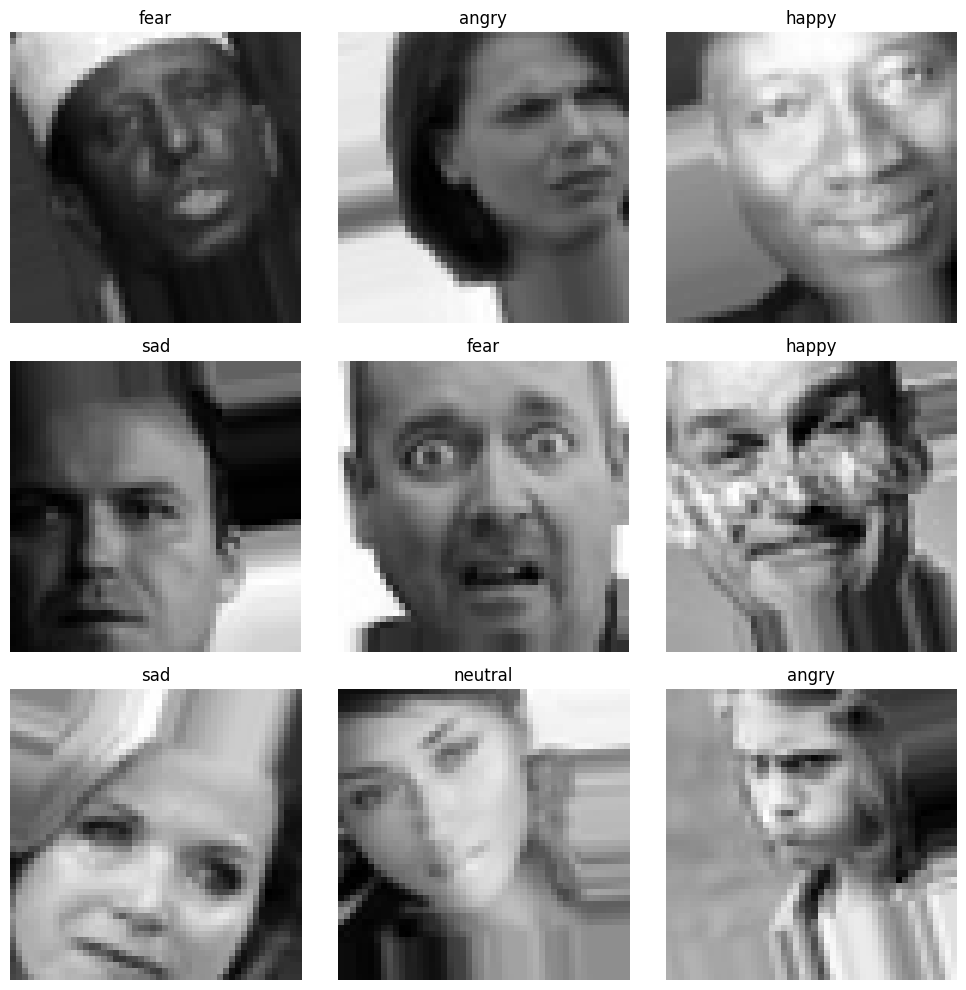

In [4]:
class_names=list(train_generator.class_indices.keys())

images, labels=next(train_generator)

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i].reshape(48,48), cmap='gray')
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis('off')
plt.tight_layout()
plt.show()
    

# 3. CNN MODEL ARCHITECTURE

In [5]:
model=Sequential([
    # 1 feature extraction (convoltutional layers or part)
    # 1st conv layer 
    Conv2D(64, (3,3), activation='relu', input_shape=(48, 48, 1)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

      #2 1st conv layer 
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

      # 3st conv layer 
    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Flatten(), 
    # 2 Classification (Detectin part)
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    # output layer
    Dense(7, activation='softmax')
    
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 46, 46, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 21, 21, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,474,759 (9.44 MB)

 Trainable params: 2,472,839 (9.43 MB)

 Non-trainable params: 1,920 (7.50 KB)

# 4.TRAIN MODEL

In [6]:

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6, verbose=1)

# Model Training
history = model.fit(
    train_generator,
    epochs=1,
    validation_data=validation_generator,
    callbacks=[early_stopping, lr_scheduler]
)

C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


901/901 ━━━━━━━━━━━━━━━━━━━━ 964s 1s/step - accuracy: 0.2291 - loss: 2.1340 - val_accuracy: 0.2842 - val_loss: 1.8060 - learning_rate: 0.0010


## 5. Evaluation- Classification Report & Confusion Matrix

221/221 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step
              precision    recall  f1-score   support

       angry       0.13      0.01      0.01       960
     disgust       0.00      0.00      0.00       111
        fear       0.00      0.00      0.00      1018
       happy       0.26      0.81      0.40      1825
     neutral       0.19      0.05      0.08      1216
         sad       0.18      0.13      0.15      1139
    surprise       0.09      0.02      0.03       797

    accuracy                           0.24      7066
   macro avg       0.12      0.15      0.10      7066
weighted avg       0.16      0.24      0.15      7066



C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

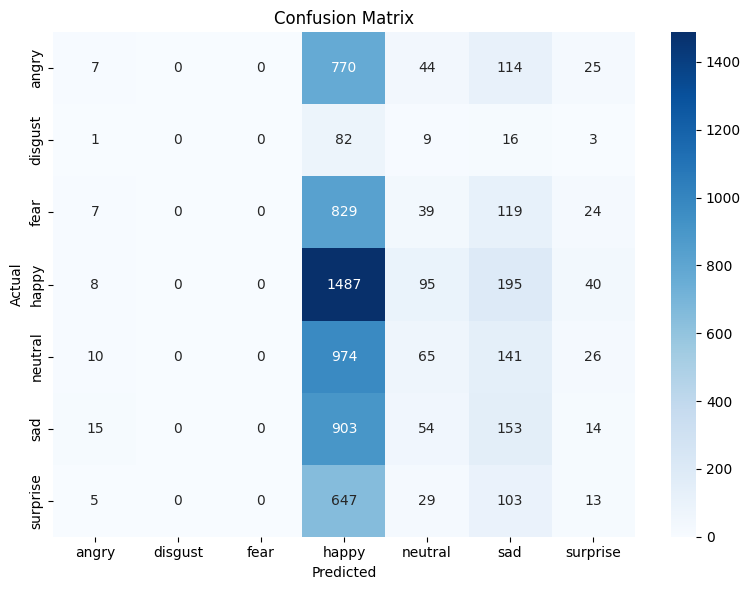

In [10]:
# 6. Evaluation - Classification Report & Confusion Matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Reset generator to start
validation_generator.reset()

# Predict on entire validation set
predictions = model.predict(
    validation_generator,
    steps=validation_generator.samples // validation_generator.batch_size + 1,
    verbose=1
)

# True & predicted labels
y_true = validation_generator.classes
y_pred = np.argmax(predictions, axis=1)

# Class names (SAFE & AUTO)
class_names = list(validation_generator.class_indices.keys())

# Classification Report
print(classification_report(
    y_true,
    y_pred,
    target_names=class_names
))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


# 6.Detection System

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def detect_emotion(image_path, model, class_names, img_size=(48, 48)):
    """
    Detect emotion from a single face image.
    """

    # Load & preprocess image
    img = image.load_img(
        image_path,
        target_size=img_size,
        color_mode='grayscale'
    )
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # (1, 48, 48, 1)

    # Predict
    predictions = model.predict(img_array, verbose=0)
    predicted_index = np.argmax(predictions, axis=1)[0]

    predicted_class = class_names[predicted_index]
    confidence = round(float(predictions[0][predicted_index]) * 100, 2)

    # Display image + prediction
    plt.figure(figsize=(4, 4))
    plt.imshow(img, cmap='gray')
    plt.title(f"{predicted_class} ({confidence}%)")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    return predicted_class, confidence


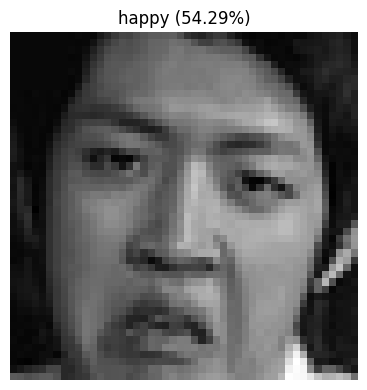

('happy', 54.29)


In [16]:
print(
    detect_emotion(
        'validation/disgust/807.jpg',
        model=model,
        class_names=class_names
    )
)


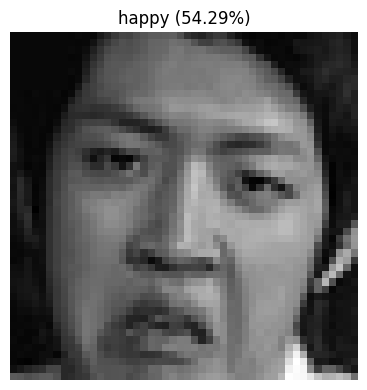

Emotion: happy, Confidence: 54.29%


In [17]:
emotion, confidence = detect_emotion(
    'validation/disgust/807.jpg',
    model,
    class_names
)

print(f"Emotion: {emotion}, Confidence: {confidence}%")


# 7.Save Model

In [18]:
# 8. Save Model
model.save('facial_emotion_detection_model.h5')